## Analyzing, and Visualizing Data

In [1]:
# importing important libraries 
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Style as 'seaborn-colorblind'
matplotlib.style.use('seaborn-colorblind')

In [3]:
# Reading the 'twitter_df'
df = pd.read_csv('twitter_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 24 columns):
tweet_id           1993 non-null int64
timestamp          1993 non-null object
source             1993 non-null object
text               1993 non-null object
expanded_urls      1993 non-null object
name               1361 non-null object
doggo              74 non-null object
floofer            8 non-null object
pupper             212 non-null object
puppo              23 non-null object
favorites          1993 non-null int64
retweets           1993 non-null int64
user_followers     1993 non-null int64
user_favourites    1993 non-null int64
jpg_url            1993 non-null object
img_num            1993 non-null int64
p1                 1993 non-null object
p2                 1993 non-null object
p3                 1993 non-null object
dog_stage          306 non-null object
breed              1685 non-null object
confidence         1993 non-null float64
rating             1993 non

In [4]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,...,jpg_url,img_num,p1,p2,p3,dog_stage,breed,confidence,rating,dog_gender
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,NaN,NaN,NaN,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,bagel,banana,NaN,NaN,0.000000,13/10,NaN
1,683857920510050305,2016-01-04 03:50:08,Twitter for iPhone,Meet Sadie. She fell asleep on the beach and h...,https://twitter.com/dog_rates/status/683857920...,Sadie,NaN,NaN,NaN,NaN,...,https://pbs.twimg.com/media/CX2NJmRWYAAxz_5.jpg,1,bluetick,Shetland_sheepdog,beagle,NaN,bluetick,0.174738,10/10,female
2,684097758874210310,2016-01-04 19:43:10,Twitter for iPhone,Say hello to Lupe. This is how she sleeps. 10/...,https://twitter.com/dog_rates/status/684097758...,Lupe,NaN,NaN,NaN,NaN,...,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,1,Labrador_retriever,German_short-haired_pointer,Chesapeake_Bay_retriever,NaN,Labrador_retriever,0.627856,10/10,female
3,684122891630342144,2016-01-04 21:23:02,Twitter for iPhone,Heartwarming scene of two pups that want nothi...,https://twitter.com/dog_rates/status/684122891...,NaN,NaN,NaN,NaN,NaN,...,https://pbs.twimg.com/media/CX5-HslWQAIiXKB.jpg,1,cheetah,Arabian_camel,jaguar,NaN,NaN,0.000000,11/10,NaN
4,684177701129875456,2016-01-05 01:00:50,Twitter for iPhone,This is Kulet. She's very proud of the flower ...,https://twitter.com/dog_rates/status/684177701...,Kulet,NaN,NaN,NaN,NaN,...,https://pbs.twimg.com/media/CX6v_JOWsAE0beZ.jpg,1,chow,German_shepherd,golden_retriever,NaN,chow,0.334783,10/10,female


In [5]:
# Changing to right dtypes
df['tweet_id'] = df['tweet_id'].astype(str)
df['timestamp'] = pd.to_datetime(df.timestamp)
df['source'] = df['source'].astype('category')
df['favorites'] = df['favorites'].astype(int)
df['retweets'] = df['retweets'].astype(int)
df['user_followers'] = df['user_followers'].astype(int)
df['dog_stage'] = df['dog_stage'].astype('category')
df['dog_gender'] = df['dog_gender'].astype('category')

In [6]:
# looking at summary of df
df.describe()

,favorites,retweets,user_followers,user_favourites,img_num,confidence
count,1993.000000,1993.000000,1.993000e+03,1993.000000,1993.000000,1993.000000
mean,8882.965379,2731.905168,6.629520e+06,132917.979930,1.203211,0.464930
std,12609.068748,4714.424803,1.691947e+02,0.199393,0.560899,0.339545
min,80.000000,13.000000,6.629057e+06,132916.000000,1.000000,0.000000
25%,1930.000000,612.000000,6.629344e+06,132918.000000,1.000000,0.140394
50%,4053.000000,1318.000000,6.629536e+06,132918.000000,1.000000,0.458746
75%,11192.000000,3139.000000,6.629660e+06,132918.000000,1.000000,0.776400
max,143885.000000,77689.000000,6.629803e+06,132918.000000,4.000000,0.999956


**Plot the correlation map to see the relationship between variables**

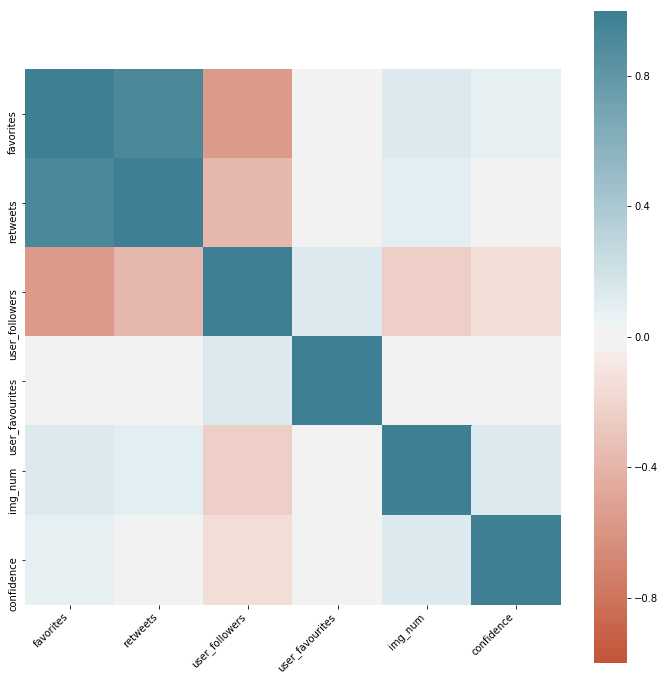

In [21]:
# ploting co-relation matrix
f,ax = plt.subplots(figsize=(12, 12))
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

- There is strong correlation between favorites and retweet(more favorites mean more retweets)
- Followers and retweet have negative correlation(-.4) which means they opposite in normal prediction
- Rating_numerator doesn't relate with any features

**Tweet Retweet Vs Favorites**

In [8]:
# Creating colors columns of light colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#E580E8','#FF684F','#DCDCDD']

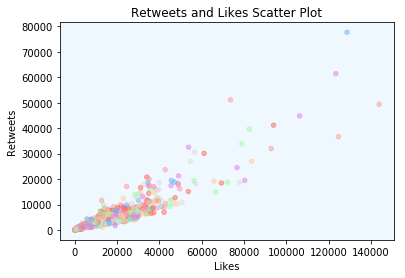

In [9]:
# plotting scatter plot
ax = df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5, color = colors)
plt.xlabel('Likes')
plt.ylabel('Retweets')
plt.title('Retweets and Likes Scatter Plot')
ax.set_facecolor("#f0f8ff");

- high and postive correlation b/w Favorites and Retweets

**Dog stage count**:

In [11]:
df['dog_stage'].value_counts()

pupper     203
doggo       74
puppo       22
floofer      7
Name: dog_stage, dtype: int64

In [12]:
# preparing for pie-chart
dog_stage_count = list(df['dog_stage'].value_counts())[0:4]
dog_stages = df[df['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = np.linspace(0,0.4,4)

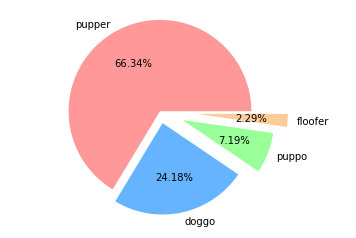

In [13]:
# plotting dog stages with a pie chart.
fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, autopct='%.2f%%', colors = colors)
ax1.axis('equal');

**Most accounted Breed**

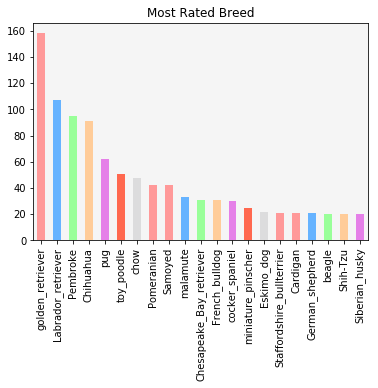

In [14]:
# ploting breed wise with count >= 20 
ten = df.groupby('breed').filter(lambda x: len(x) >= 20)
ax = ten['breed'].value_counts().plot(kind = 'bar', color=colors)
plt.title('Most Rated Breed')
ax.set_facecolor("#f5f5f5");

- We must know any breed is equally important. However through the data golden_retriever most accounted breed

**Looking to breed with favorite and retweets using prediction #1**

In [15]:
# Most Favorite dogs 
dog_fav = df.groupby('p1')['favorites'].sum().sort_values(ascending=False).head(10)
dog_fav

p1
golden_retriever      1687262
Labrador_retriever    1099245
Pembroke               996938
Chihuahua              682941
Samoyed                533688
French_bulldog         478019
chow                   408406
pug                    314450
cocker_spaniel         310251
Pomeranian             304159
Name: favorites, dtype: int64

In [16]:
# Most Retweet dogs
dog_retweet = df.groupby('p1')['retweets'].sum().sort_values(ascending=False).head(10)
dog_retweet

p1
golden_retriever      495259
Labrador_retriever    355794
Pembroke              276009
Chihuahua             221340
Samoyed               179938
French_bulldog        123170
chow                  116442
Pomeranian            106507
cocker_spaniel         98001
pug                    96722
Name: retweets, dtype: int64

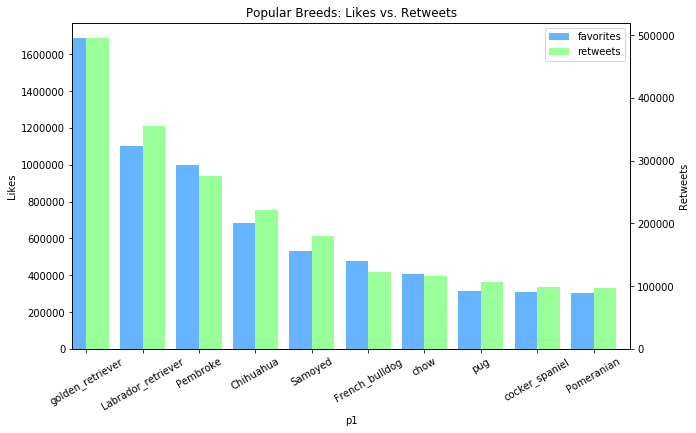

In [17]:
# Creates figure
fig = plt.figure() 
# Creates axes
ax = fig.add_subplot(111) 

# Share axis ax with ax2
ax2 = ax.twinx() 

width = 0.4

dog_fav.plot(figsize = (10,6), kind='bar', color='#66b3ff', ax=ax, width=width, position=1, title='Popular Breeds: Likes vs. Retweets')
dog_retweet.plot(figsize = (10,6), kind='bar', color='#99ff99', ax=ax2, width=width, position=0)

# Turns off grid on the left Axis and right Axis.
ax.grid(False)
ax2.grid(False)

# Adding labels 
ax.set_ylabel('Likes')
ax2.set_ylabel('Retweets')

ax.set_xticklabels(dog_fav.index, rotation=30)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=1)
plt.show()

In [18]:
df.name.value_counts()

Charlie      11
Lucy         10
Cooper       10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Daisy         7
Lola          7
Toby          7
Stanley       6
Bo            6
Jax           6
Koda          6
Bella         6
Scout         5
Oscar         5
Chester       5
Dave          5
Buddy         5
Bailey        5
Milo          5
Leo           5
Louis         5
Rusty         5
Reggie        4
Jack          4
Brody         4
Cassie        4
             ..
Philbert      1
Nugget        1
Kramer        1
Fido          1
Marlee        1
Gerbald       1
Cermet        1
Hanz          1
Tango         1
Jebberson     1
Staniel       1
Josep         1
Gidget        1
Zuzu          1
Kulet         1
Tyrone        1
Jerome        1
Willem        1
Severus       1
Tito          1
Tripp         1
Fletcher      1
Amber         1
Juckson       1
Grizz         1
Sobe          1
Bloop         1
Luther        1
Jeffrie       1
Jazzy         1
Name: name, Length: 923,

- Oliver, Cooper, Charlie, and Lucy is most popular name

In [19]:
# most account rating
df['rating'].value_counts()[:10]

12/10    450
10/10    418
11/10    396
13/10    261
9/10     150
8/10      95
7/10      51
14/10     35
5/10      32
6/10      32
Name: rating, dtype: int64

In [20]:
#Max and Min rating
df['rating'].max(), df['rating'].min()

('99/90', '0/10')

## Conclusion: 

- WeRateDogs (@dog_rates) shares beautiful pictures of dogs with adorable poses and expression. These are rated of scale of one to ten, however in most cases the rating were much much higher with max '99/90' and min '0/10'. Most rated were '12/10' and '10/10'.
- Most popular Dog name is Oliver, Cooper, Charlie, and Lucy.
- Most popular breed of dog is golden_retriever and second Labrador_retriever.
- Most of these dogs were in pupper stage.
- And its highly likely that more follower means more retweets.